# reset the memory

In [1]:
%reset -f 

# let's see how to do a regression using Python package "statsmodels"

In [1]:
import numpy  as np
import scipy  as sp
import pandas as pd

import statsmodels.api   as sm
import matplotlib.pyplot as plt

# load data into python

In [2]:
df = pd.read_csv("HPRICE3.csv")

# check the data in the table "df"

In [3]:
df.describe()

,year,age,agesq,nbh,cbd,inst,linst,price,rooms,area,land,baths,dist,ldist,lprice,y81,larea,lland,linstsq
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,1979.327103,18.009346,1381.566978,2.208723,15822.429907,16442.367601,9.480513,96100.660436,6.585670,2106.728972,39629.890966,2.339564,20715.576324,9.837414,11.378118,0.442368,7.597232,10.301859,90.482240
std,1.492329,32.565845,4801.788757,2.164353,8967.106296,9033.130652,0.777165,43223.728867,0.901204,694.957902,39514.390241,0.770526,8508.183950,0.478383,0.438174,0.497443,0.340723,0.801752,14.066464
min,1978.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,6.907800,26000.000000,4.000000,735.000000,1710.000000,1.000000,5000.000000,8.517193,10.165852,0.000000,6.599871,7.444249,47.717705
25%,1978.000000,0.000000,0.000000,0.000000,9000.000000,9000.000000,9.104999,65000.000000,6.000000,1560.000000,16935.000000,2.000000,13400.000000,9.503010,11.082143,0.000000,7.352441,9.737138,82.901016
50%,1978.000000,4.000000,16.000000,2.000000,14000.000000,16000.000000,9.680300,85900.000000,7.000000,2056.000000,43560.000000,2.000000,19900.000000,9.898475,11.360939,0.000000,7.628518,10.681894,93.708206
75%,1981.000000,22.000000,484.000000,4.000000,23000.000000,24000.000000,10.086000,120000.000000,7.000000,2544.000000,46100.000000,3.000000,27200.000000,10.210970,11.695247,1.000000,7.841493,10.738568,101.727400
max,1981.000000,189.000000,35721.000000,6.000000,35000.000000,34000.000000,10.434000,300000.000000,10.000000,5136.000000,544500.000000,4.000000,40000.000000,10.596630,12.611538,1.000000,8.544030,13.207623,108.868350


In [4]:
df.head()

,year,age,agesq,nbh,cbd,inst,linst,price,rooms,area,land,baths,dist,ldist,lprice,y81,larea,lland,linstsq
0,1978,48,2304,4,3000,1000,6.9078,60000,7,1660,4578,1,10700,9.277999,11.002100,0,7.414573,8.429017,47.717705
1,1978,83,6889,4,4000,1000,6.9078,40000,6,2612,8370,2,11000,9.305651,10.596635,0,7.867871,9.032409,47.717705
2,1978,58,3364,4,4000,1000,6.9078,34000,6,1144,5000,1,11500,9.350102,10.434115,0,7.042286,8.517193,47.717705
3,1978,11,121,4,4000,1000,6.9078,63900,5,1136,10000,1,11900,9.384294,11.065075,0,7.035269,9.210340,47.717705
4,1978,48,2304,4,4000,2000,7.6009,44000,5,1868,10000,1,12100,9.400961,10.691945,0,7.532624,9.210340,57.773682


In [5]:
df.tail()

,year,age,agesq,nbh,cbd,inst,linst,price,rooms,area,land,baths,dist,ldist,lprice,y81,larea,lland,linstsq
316,1981,25,625,0,10000,10000,9.2103,60000,6,1388,7500,1,16900,9.735069,11.002100,1,7.235619,8.922658,84.829636
317,1981,0,0,6,24000,26000,10.1660,144500,7,3140,48787,3,25000,10.126630,11.881035,1,8.051978,10.795219,103.347560
318,1981,20,400,0,15000,15000,9.6158,97000,6,1296,44867,2,21300,9.966462,11.482467,1,7.167038,10.711458,92.463608
319,1981,19,361,0,14000,15000,9.6158,95000,5,1148,44182,2,20500,9.928180,11.461632,1,7.045776,10.696073,92.463608
320,1981,0,0,0,13000,13000,9.4727,204080,7,2261,45465,3,19400,9.873028,12.226268,1,7.723562,10.724698,89.732048


# check the data for specific variables in the table "df"

# we focus on $\log \left( \mathrm{price} \right)$ and $\mathrm{rooms}$

In [8]:
df[['lprice','rooms']].describe()

,lprice,rooms
count,321.000000,321.000000
mean,11.378118,6.585670
std,0.438174,0.901204
min,10.165852,4.000000
25%,11.082143,6.000000
50%,11.360939,7.000000
75%,11.695247,7.000000
max,12.611538,10.000000


In [9]:
df[['lprice','rooms']].head()

,lprice,rooms
0,11.002100,7
1,10.596635,6
2,10.434115,6
3,11.065075,5
4,10.691945,5


In [10]:
df[['lprice','rooms']].tail()

,lprice,rooms
316,11.002100,6
317,11.881035,7
318,11.482467,6
319,11.461632,5
320,12.226268,7


# start regression using statsmodels

In [11]:
Xvar = df[['rooms']]
Yvar = df[['lprice']]
Xvar = sm.add_constant(Xvar)

In [12]:
Yvar

,lprice
0,11.002100
1,10.596635
2,10.434115
3,11.065075
4,10.691945
...,...
316,11.002100
317,11.881035
318,11.482467
319,11.461632


In [13]:
Xvar

,const,rooms
0,1.0,7
1,1.0,6
2,1.0,6
3,1.0,5
4,1.0,5
...,...,...
316,1.0,6
317,1.0,7
318,1.0,6
319,1.0,5


In [15]:
reg = sm.OLS(Yvar, Xvar)

result = reg.fit()

In [16]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     102.6
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           4.32e-21
Time:                        13:10:59   Log-Likelihood:                -145.35
No. Observations:                 321   AIC:                             294.7
Df Residuals:                     319   BIC:                             302.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7985      0.157     62.254      0.0

# reinvent the wheels : univarite OLS
# $$b_1 = \frac{cov(x,y)}{var(x)} = \frac{ \sum_i (x - \overline{x}) (y - \overline{y}) }{ \sum_i (x-\overline{x})^2 }$$

In [19]:
np.cov(df['lprice'], df['rooms'])

array([[0.19199684, 0.19480189],
       [0.19480189, 0.812169  ]])

In [21]:
cov_xy = np.cov(df['lprice'], df['rooms'])[1, 0]

cov_xy

0.19480188933021805

In [23]:
var_x = np.cov(df['rooms'])

var_x

array(0.812169)

In [24]:
b1 = cov_xy/var_x

b1

0.23985388334571905

# intercept $$b_0 = \overline{y} - b_1 \cdot \overline{x}$$

In [25]:
b0 = np.mean(df['lprice']) - b1 * np.mean(df['rooms'])

b0

9.798519525255918

# predicted value of y $$\widehat{y} = b_0 + b_1 \cdot x$$

In [26]:
df['yhat'] = b0 + b1 * df['rooms']

In [27]:
df['yhat'].describe()

count    321.000000
mean      11.378118
std        0.216157
min       10.757935
25%       11.237643
50%       11.477497
75%       11.477497
max       12.197058
Name: yhat, dtype: float64

<AxesSubplot:>

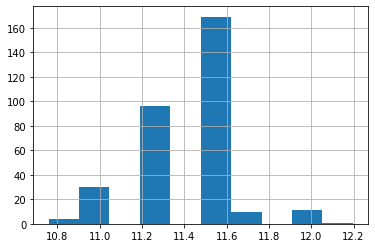

In [28]:
df['yhat'].hist()

# predicted value of u (aka the prediction error of y) $$\widehat{u} = y - \widehat{y}$$

In [29]:
df['uhat'] = df['lprice'] - df['yhat']

In [30]:
df['uhat'].describe()

count    3.210000e+02
mean     1.527335e-15
std      3.811468e-01
min     -1.311645e+00
25%     -2.259357e-01
50%     -2.644671e-02
75%      2.448242e-01
max      1.134041e+00
Name: uhat, dtype: float64

<AxesSubplot:>

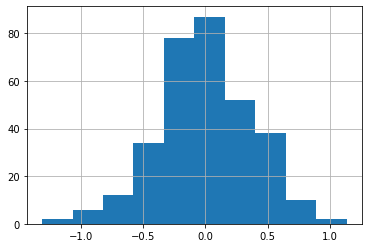

In [31]:
df['uhat'].hist()

# calculate the values for regression inference

# TSS $$ TSS = \sum_i (y_i - \overline{y} )^2 = \mathrm{var}(y) \cdot (n-1)$$

In [32]:
TSS = np.cov(df['lprice']) * ( len(df['lprice']) - 1)

TSS

61.438988950382985

# RSS $$ RSS = \sum_i (\widehat{u}_i )^2 = \mathrm{var}(\widehat{u}) \cdot (n - 1 - 1)$$

In [35]:
RSS = np.cov(df['uhat']) *  ( len(df['lprice']) - 1)

RSS

46.48731226592352

# ESS $$ ESS = TSS - RSS$$

In [36]:
ESS = TSS - RSS

ESS

14.951676684459464

# $R^2$ $$ R^2 = ESS/TSS = 1 - RSS/TSS$$

In [38]:
R2 = ESS/TSS

R2

0.2433581173761529

# adjusted $R^2$ $$ \overline{R}^2 = 1 - \frac{RSS/(n-1-1)}{TSS/(n-1)}$$

In [39]:
R2_a = 1 - (RSS / ( len(df['lprice']) - 1 - 1 ) ) / (TSS / ( len(df['lprice']) - 1 ) )

R2_a

0.24098619924880538

# se of $b_1$ $$se_{b_1} = \sqrt{ \frac{ var(\widehat{u})}{ \sum_i (x - \overline{x})^2} } = \sqrt{ \frac{ var(\widehat{u})}{ var(x) \cdot (n-1) }}$$

In [41]:
var_u = RSS / (len(df['lprice']) - 1 - 1)

se_b1 = np.sqrt( var_u / (np.cov(df['rooms']) * (len(df['lprice']) - 1) ))

se_b1

0.02367956297520075

# t value for $b_1$ $$ t_{b_1} = b_1 / se_{b_1} $$

In [42]:
t_b1 = b1 / se_b1

t_b1

10.129151606257025

# two-tailed p-value for $t_{b_1}$

In [43]:
p_b1 = 2 * sp.stats.t.sf( np.abs(t_b1),  len(df['lprice']) - 1 - 1)

p_b1

4.320029628125147e-21

# the upper/lower bound for the CI of slope
# $$ up = b_1 + c \cdot se_{b_1}$$
# $$ lo = b_1 - c \cdot se_{b_1}$$

In [44]:
c = sp.stats.t.ppf(0.975, len(df['rooms']) - 1 - 1)

b1_up = b1 + c * se_b1
b1_lo = b1 - c * se_b1

print(b1_up)
print(b1_lo)

0.28644172773256615
0.19326603895887198


# se of $b_0$ $$se_{b_0} = \sqrt{ var( \widehat{u} ) \cdot \left( \frac{1}{n} + \frac{ \overline{x}^2 }{\sum_i (x_i - \overline{x} )^2 }\right) }$$

In [46]:
se_b0 = np.sqrt( var_u * (1 / len(df['rooms']) + np.power( np.mean(df['rooms']), 2) / ( np.cov(df['rooms']) * (len(df['rooms']) - 1) )  ) )

se_b0

0.15739462862619946

# t value for $b_0$ $$ t_{b_0} = b_0 / se_{b_0} $$

In [47]:
t_b0 = b0 / se_b0

t_b0

62.25447215563291

# two-tailed p-value for $t_{b_0}$

In [48]:
p_b0 = 2 * sp.stats.t.sf( np.abs(t_b0),  len(df['lprice']) - 1 - 1)

p_b0

1.5919185397026186e-180

# the upper/lower bound for the CI of intercept
# $$ up = b_0 + c \cdot se_{b_0}$$
# $$ lo = b_0 - c \cdot se_{b_0}$$

In [49]:
c = sp.stats.t.ppf(0.975, len(df['rooms']) - 1 - 1)

b0_up = b0 + c * se_b0
b0_lo = b0 - c * se_b0

print(b0_up)
print(b0_lo)

10.108182185561024
9.488856864950812
